In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv("./data/caching.csv")
df["mean_runtime(s)"] = df["runtime(s)"] / df["n_runs"]
df["L1_DC_HIT_PERCENT"] = 100 - df["L1_DC_MISS_PERCENT"]
df["group_id"] = [1,1,1,2,3,4,1,2,3,1,2,3,1,2,3]
df["algorithm_param"] = df["algorithm"] + "_" + df["param"].astype(str)
df.iloc[0, -1] = "vanilla"
df.iloc[1, -1] = "parfor"
df

,algorithm,n_runs,runtime(s),N,threads,param,L1_DC_MISS_PERCENT,mean_runtime(s),L1_DC_HIT_PERCENT,group_id,algorithm_param
0,vanilla,10,391.296,2048,16,1,9.50,39.1296,90.50,1,vanilla
1,parfor,10,34.349,2048,16,1,14.12,3.4349,85.88,1,parfor
2,tiled,10,20.217,2048,16,8,12.82,2.0217,87.18,1,tiled_8
3,tiled,10,22.985,2048,16,16,24.79,2.2985,75.21,2,tiled_16
4,tiled,10,26.099,2048,16,32,28.35,2.6099,71.65,3,tiled_32
5,tiled,10,25.994,2048,16,64,27.01,2.5994,72.99,4,tiled_64
6,DAC_notemp,10,74.344,2048,16,16,7.62,7.4344,92.38,1,DAC_notemp_16
7,DAC_notemp,10,75.341,2048,16,32,7.67,7.5341,92.33,2,DAC_notemp_32
8,DAC_notemp,10,74.410,2048,16,64,6.93,7.4410,93.07,3,DAC_notemp_64
9,DAC_temp,10,41.552,2048,16,16,7.73,4.1552,92.27,1,DAC_temp_16


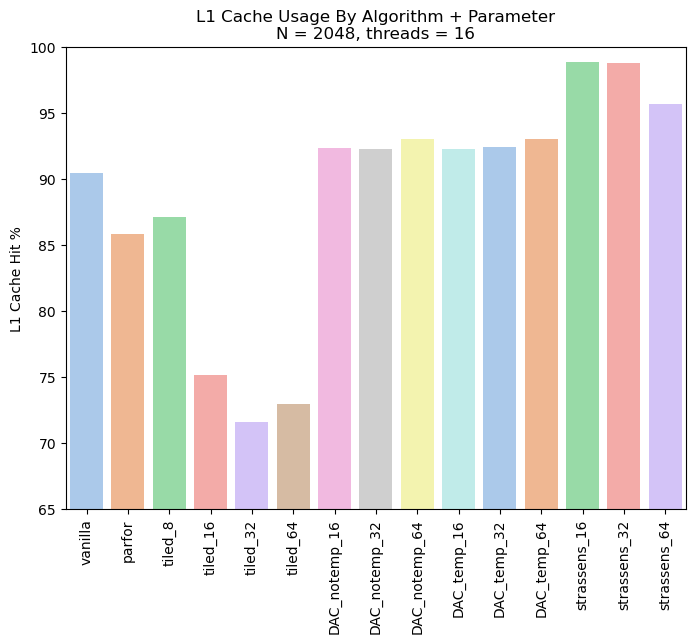

In [62]:
sns.barplot(df, x="algorithm_param", y="L1_DC_HIT_PERCENT", hue="algorithm_param", palette="pastel", legend=False)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylim(65, 100)
plt.ylabel("L1 Cache Hit %")
plt.gcf().set_size_inches(8, 6)
plt.title("L1 Cache Usage By Algorithm + Parameter\nN = 2048, threads = 16")
plt.savefig("./figures/cache.png")
plt.show()

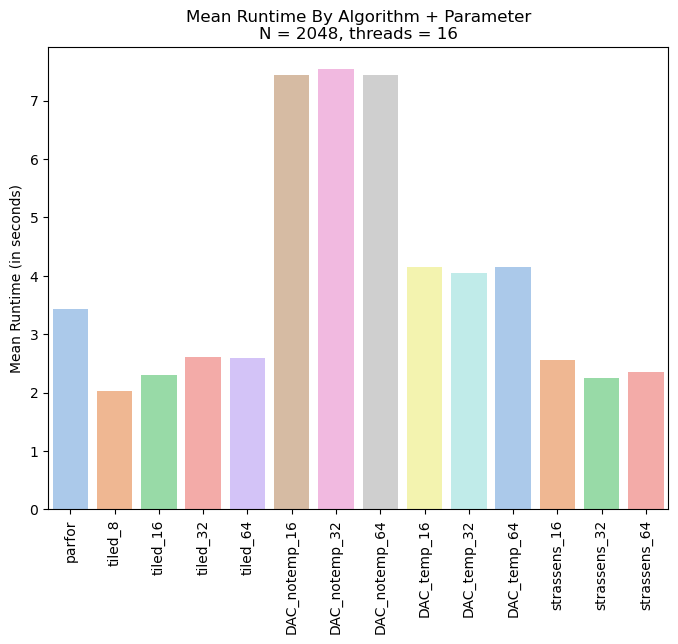

In [63]:
sns.barplot(df.iloc[1:], x="algorithm_param", y="mean_runtime(s)", hue="algorithm_param", palette="pastel", legend=False)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Mean Runtime (in seconds)")
plt.gcf().set_size_inches(8, 6)
plt.title("Mean Runtime By Algorithm + Parameter\nN = 2048, threads = 16")
plt.savefig("./figures/runtime.png")
plt.show()